In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm


data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment-02/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]


x_label0    = x[label == 0]
y_label0    = y[label == 0]

x_label1    = x[label == 1]
y_label1    = y[label == 1]

lb_0 = np.column_stack([x_label0, y_label0, np.zeros(len(x_label0))])
lb_1 = np.column_stack([x_label1, y_label1, np.ones(len(x_label1))])


train_set = np.vstack([lb_0,lb_1])


In [0]:
func = lambda x,y,i,j: (x**i) * (y**j)


def f(data):
    result = []
    q = np.ones(len(data[0,:]))
    for t in range(100):
        i = t // 10
        j = t % 10
        result.append(list(map(func, data[0,:], data[1,:],q*i,q* j)))
    
    return np.array(result)


def partialDiff(data, t):
    q = np.ones(len(data[0,:]))
    i = t // 10
    j = t % 10
    return list(map(func, data[0,:], data[1,:], q*i, q*j ))



In [0]:
alpha = 3


p_lambda_1 = 0.000001
p_lambda_2 = 1
p_lambda_3 = 10

m = len(train_set)

def z(th, x):
    return np.matmul(th,f(x))
def h(th, x):
    return 1 / (1 +np.exp(-z(th, x)))
def J(th, data, lam): 
    return (1/(m)) * np.sum(                                                   \
        - data[:,2] * np.log(h(th,np.transpose(data[:,0:2])))                  \
        - (1-data[:,2]) * np.log(1 - h(th,np.transpose(data[:,0:2])))          \
        ) + (1/(2 * m)) * (lam) * (np.sum(th**2)-th[0]**2)
def accuracy(th):
    answer = train_set[:,2]
    guess = np.around(h(th,np.transpose(train_set[:,0:2])))
    return np.sum(np.equal(answer, guess)) / m


def th_cal(th, lam):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:2])) - train_set[:,2])
    for j in range(len(th)):
        if j==0:
            result.append( th[j]-(alpha * (1/m) * (np.sum(  diff * partialDiff(np.transpose(train_set[:,0:2]), j) )   )) )
        else:
            result.append( th[j]-(alpha * (1/m) * (np.sum(  diff * partialDiff(np.transpose(train_set[:,0:2]), j) ) + lam * th[j]  )) )
    return np.array(result)


In [0]:

g_th_1 = np.array(np.ones(100))
J_log_train_1 = [J(g_th_1, train_set, p_lambda_1)]
th_log_1 = [g_th_1]
accuracy_log_1 = [accuracy(g_th_1)]

g_th_2 = np.array(np.ones(100))
J_log_train_2 = [J(g_th_2, train_set, p_lambda_2)]
th_log_2 = [g_th_2]
accuracy_log_2 = [accuracy(g_th_2)]

g_th_3 = np.array(np.ones(100))
J_log_train_3 = [J(g_th_3, train_set, p_lambda_3)]
th_log_3 = [g_th_3]
accuracy_log_3 = [accuracy(g_th_3)]


In [0]:
from tqdm.notebook import tqdm
for i in tqdm(range(1000)):


    g_th_1 = th_cal(g_th_1, p_lambda_1)
    J_log_train_1.append(J(g_th_1, train_set, p_lambda_1))
    th_log_1.append(g_th_1)
    accuracy_log_1.append(accuracy(g_th_1))

    g_th_2 = th_cal(g_th_2, p_lambda_2)
    J_log_train_2.append(J(g_th_2, train_set, p_lambda_2))
    th_log_2.append(g_th_2)
    accuracy_log_2.append(accuracy(g_th_2))

    g_th_3 = th_cal(g_th_3, p_lambda_3)
    J_log_train_3.append(J(g_th_3, train_set, p_lambda_3))
    th_log_3.append(g_th_3)
    accuracy_log_3.append(accuracy(g_th_3))





---



#로지스틱 회귀 실습

##### 1. Plot the training data [2pt]
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)




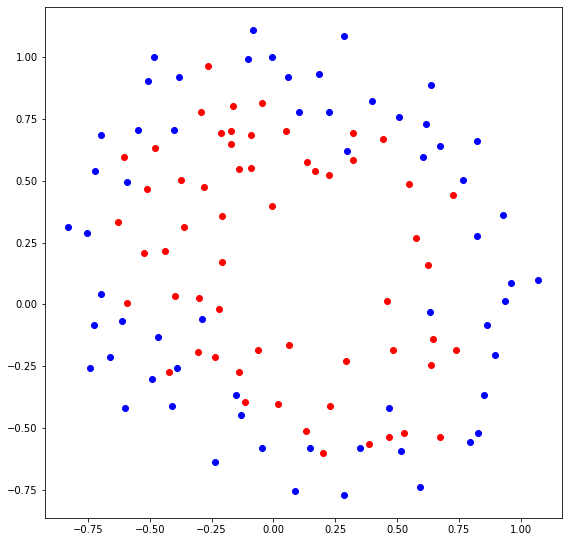

In [0]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##### 2. Plot the training error with varying regularization parameters
- choose a value for $\lambda_1$ in such a way that `over-fitting` is demonstrated and plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in red color) [3pt]
- choose a value for $\lambda_2$ in such a way that `just-right` is demonstrated and plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in green color) [3pt]
- choose a value for $\lambda_3$ in such a way that `under-fitting` is demonstrated and plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure


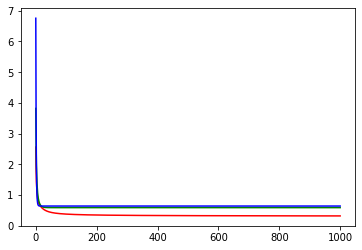

In [0]:
plt.plot(J_log_train_1,c='red')
plt.plot(J_log_train_2,c='green')
plt.plot(J_log_train_3,c='blue')
plt.show()

##### 3. Display the values of the chosen regularization parameters
- display the value of the chosen $\lambda_1$ for the demonstration of `over-fitting` (in red color) [1pt]
- display the value of the chosen $\lambda_2$ for the demonstration of `just-right` (in green color) [1pt]
- display the value of the chosen $\lambda_3$ for the demonstration of `under-fitting` (in blue color) [1pt]



In [0]:
print ("\033[31m",p_lambda_1)
print ("\033[32m",p_lambda_2)
print ("\033[34m",p_lambda_3)

 1e-06
 3
 10


##### 4. Plot the training accuracy with varying regularization parameters
- plot the training accuracy with the chosen $\lambda_1$ for `over-fitting` at every iteration of gradient descent until convergence (in red color) [3pt]
- plot the training accuracy with the chosen $\lambda_2$ for `just-right` at every iteration of gradient descent until convergence (in green color) [3pt]
- plot the training accuracy with the chosen $\lambda_3$ for `under-fitting` at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure


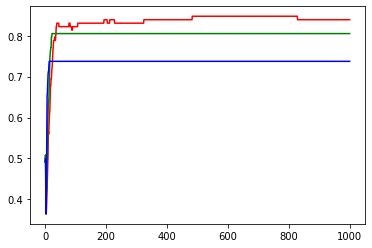

In [0]:
plt.plot(accuracy_log_1,c='red')
plt.plot(accuracy_log_2,c='green')
plt.plot(accuracy_log_3,c='blue')

plt.show()

##### 5. Display the final training accuracy with varying regularization parameters
- display the final training accuracy obtained with the chosen $\lambda_1$ for `over-fitting` in number (%) at convergence (in red color) [1pt]
- display the final training accuracy obtained with the chosen $\lambda_2$ for `just-right` in number (%) at convergence (in green color) [1pt]
- display the final training accuracy obtained with the chosen $\lambda_3$ for `under-fitting` in number (%) at convergence (in blue color) [1pt]



In [0]:
print ("\033[31m",accuracy(g_th_1)*100,"%")
print ("\033[32m",accuracy(g_th_2)*100,"%")
print ("\033[34m",accuracy(g_th_3)*100,"%")

 83.89830508474576 %
 80.50847457627118 %
 73.72881355932203 %


##### 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data
- plot the boundary of the optimal classifier with the chosen $\lambda_1$ for `over-fitting` at convergence (in red color) [3pt]
- plot the boundary of the optimal classifier with the chosen $\lambda_2$ for `just-right` at convergence (in green color) [3pt]
- plot the boundary of the optimal classifier with the chosen $\lambda_3$ for `under-fitting` at convergence (in blue color) [3pt]
- the boundary of the classifier is defined by $\{ (x, y) \mid \sigma(g(x, y ; \theta)) = 0.5 \} = \{ (x, y) \mid g(x, y ; \theta) = 0 \}$
- the boundaries of the classifiers with different regularization parameters should be presented with the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)
- you can use `contour` function in python3



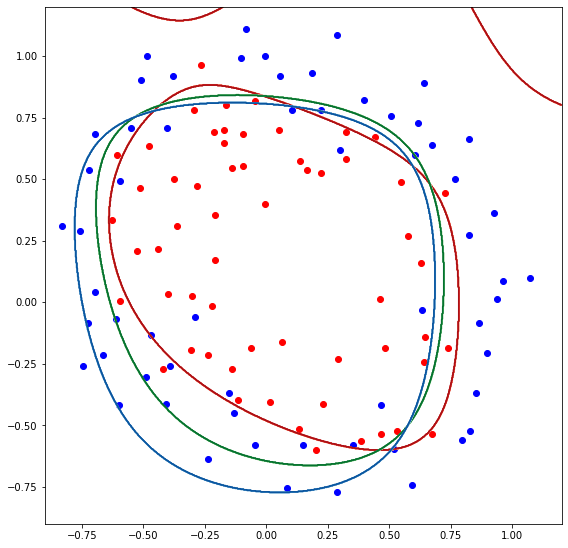

In [633]:
X, Y = np.meshgrid(np.linspace(-0.9, 1.2, 1000), np.linspace(-0.9, 1.2, 1000))


Z_1 = np.array([  np.around( h(g_th_1, np.array([x,y]) ) )      for x,y in zip(X,Y)  ])
Z_2 = np.array([  np.around( h(g_th_2, np.array([x,y]) ) )      for x,y in zip(X,Y)  ])
Z_3 = np.array([  np.around( h(g_th_3, np.array([x,y]) ) )      for x,y in zip(X,Y)  ])


plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z_1, cmap='Reds')
plt.contour(X, Y, Z_2, cmap='Greens')
plt.contour(X, Y, Z_3, cmap='Blues')


plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')


plt.show()